# CSCE633 Machine Learning - HW1

## Programming Questions

### (a) Data Processing (4 points)

#### 1. Download and read the data. For Python, you may use pandas library and use read csv function.

Put the data_train.csv and data_test.csv under the root directory or inside a data folder.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as sk_linear
from sklearn.metrics import roc_curve, roc_auc_score

train_data_path = "./data/data_train.csv"
test_data_path = "./data/data_test.csv"

if not os.path.exists(train_data_path):
    train_data_path = "./data_train.csv"

if not os.path.exists(test_data_path):
    test_data_path = "./data_test.csv"
    
assert os.path.exists(train_data_path) and os.path.exists(test_data_path),"Data not found." 

print("Reading train data from: {}".format(train_data_path))
print("Reading test data from: {}".format(test_data_path))

ckpt_dir = "./checkpoints"
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

Reading train data from: ./data/data_train.csv
Reading test data from: ./data/data_test.csv


#### 2. Print the first 5 rows of the data using the command. (You may use head() function in pandas library). Print the shape of the training dataframe. Write a short description of the data.

In [2]:
train_df = pd.read_csv(train_data_path, index_col=0)
test_df = pd.read_csv(test_data_path, index_col=0)
num_rows = 5 # 
print("First {} rows of the training data: ".format(num_rows))
print(train_df.head(n=num_rows))

print("=================================================================================")

print("First {} rows of the test data: ".format(num_rows))
print(test_df.head(n=num_rows))

print("=================================================================================")
print("The shape of the training dataframe: {}".format(train_df.shape))

First 5 rows of the training data: 
   PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0        797.0    -200.0       2.1          593.0    146.0        1212.0   
1       1282.0    -200.0      11.0         1013.0    354.0         545.0   
2        891.0    -200.0       7.6          882.0    342.0         885.0   
3       1285.0    -200.0      18.1         1243.0    481.0         599.0   
4        892.0    -200.0       7.3          869.0     71.0         953.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0     72.0         984.0        494.0  10.8  49.7  0.6429  
1    141.0        1384.0       1287.0  17.4  50.6  0.9989  
2    149.0         950.0        894.0   7.8  33.9  0.3594  
3    173.0        1815.0       1582.0  26.4  41.9  1.4237  
4     77.0        1363.0        632.0  37.4  14.7  0.9295  
First 5 rows of the test data: 
   NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0    -200.0       8.0          898.0    122

Write-Up: There are 6250 samples of training data, each data contains 12 features. 

#### 3. Does the data have any missing values? How many are missing? Return the number of missing values. (In pandas, check out isnull() and isnull().sum())

In [3]:
def check_missing_values(df):
    missing_values = [] # stores the row that contains missing(null) values
    total_missing_values = 0
    for index, row in df.iterrows():
        if row.isnull().any():
            missing_values.append(index)
        total_missing_values += row.isnull().sum()
    number_of_missing_values = len(missing_values)
    has_missing_values = True if number_of_missing_values > 0 else False
    
    return has_missing_values, number_of_missing_values, total_missing_values

print("Checking for missing values in the training data...")
has_missing_values, number_of_missing_values, total_missing_values = check_missing_values(train_df)
print("Does the data have any missing values? Ans:{}".format(has_missing_values))
print("How many rows have missing values? Ans:{}".format(number_of_missing_values))
print("Total number of missing values: {}".format(total_missing_values))
print("=================================================================================")

print("Checking missing values in the test data...")
has_missing_values, number_of_missing_values, total_missing_values = check_missing_values(test_df)
print("Does the data have any missing values? Ans:{}".format(has_missing_values))
print("How many rows have missing values? Ans:{}".format(number_of_missing_values))
print("Total number of missing values: {}".format(total_missing_values))
print("=================================================================================")

Checking for missing values in the training data...
Does the data have any missing values? Ans:True
How many rows have missing values? Ans:77
Total number of missing values: 924
Checking missing values in the test data...
Does the data have any missing values? Ans:True
How many rows have missing values? Ans:37
Total number of missing values: 407


#### 4. Drop all the rows with any missing data. (In pandas, check out dropna(). dropna() accepts an argument inplace, check out what it does and when it comes in handy.)

In [4]:
train_df = train_df.dropna()
print("The shape of the training dataframe after dropping rows with any missing data: {}".format(train_df.shape))

test_df = test_df.dropna()
print("The shape of the test dataframe after dropping rows with any missing data: {}".format(test_df.shape))

The shape of the training dataframe after dropping rows with any missing data: (6173, 12)
The shape of the test dataframe after dropping rows with any missing data: (3184, 11)


#### 5. Extract the features and the label. The label is PT08.S1(CO).

In [5]:
label_column = "PT08.S1(CO)"
feature_columns = [col for col in train_df.columns if col != label_column]

features = train_df[feature_columns]
label = train_df[label_column]
num_features = features.shape[1]

print("Features: {}".format(features.shape))
print(features.head(n=num_rows))
print("=================================================================================")
print("Label: {}".format(label.shape))
print(label.head(n=num_rows))

Features: (6173, 11)
   NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0    -200.0       2.1          593.0    146.0        1212.0     72.0   
1    -200.0      11.0         1013.0    354.0         545.0    141.0   
2    -200.0       7.6          882.0    342.0         885.0    149.0   
3    -200.0      18.1         1243.0    481.0         599.0    173.0   
4    -200.0       7.3          869.0     71.0         953.0     77.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0         984.0        494.0  10.8  49.7  0.6429  
1        1384.0       1287.0  17.4  50.6  0.9989  
2         950.0        894.0   7.8  33.9  0.3594  
3        1815.0       1582.0  26.4  41.9  1.4237  
4        1363.0        632.0  37.4  14.7  0.9295  
Label: (6173,)
0     797.0
1    1282.0
2     891.0
3    1285.0
4     892.0
Name: PT08.S1(CO), dtype: float64


### (b) Exploratory Data Analysis (10 points)

#### 1. Plot the histograms of all the features in the data. Do all the features have a normal distribution? Do you see any outlier values? Do you need to apply any normalization technique to these values? If so, you can transform your data in this step and explain your thought process in the corresponding markdown cell.

In [6]:
def plot_histogram(features, n_bins=50, with_normal_distribution=False):
    num_features = features.shape[1]
    feature_columns = features.columns
    
    plot_columns = 4

    plot_rows = num_features // plot_columns + 1
    fig, axes = plt.subplots(plot_rows, plot_columns, figsize=(15, 10))

    for i in range(num_features):
        row = i // plot_columns
        col = i % plot_columns
        # plot the histogram of the feature
        mean = features.iloc[:, i].mean()
        std = features.iloc[:, i].std()

        if not with_normal_distribution:
            _, bins, _ = axes[row, col].hist(features.iloc[:, i], bins=n_bins, label='Histogram')
        else:
            _, bins, _ = axes[row, col].hist(features.iloc[:, i], bins=n_bins, label='Histogram', alpha=0.5, density=True)

            # plot the normal distribution
            y = ((1 / (np.sqrt(2 * np.pi) * std)) *
                np.exp(-0.5 * ((bins - mean)/std)**2))
            axes[row, col].plot(bins, y, '--', label='Normal Distribution')

        axes[row, col].set_title(feature_columns[i])
        
    # remove the empty subplots
    for i in range(num_features, plot_rows * plot_columns):
        row = i // plot_columns
        col = i % plot_columns
        fig.delaxes(axes[row, col])

    # show the legend
    if with_normal_distribution:
        plt.suptitle("Histogram of the features and their normal distribution")
        fig.legend(["Histogram", "Normal Distribution"], loc="lower right")
    else:
        plt.suptitle("Histogram of the features")
        fig.legend(["Histogram"], loc="lower right")

    plt.tight_layout()
    plt.show()

    return

##### Plot the histograms of all features

Plot the histograms of all features, setting the number of bins to 50. The x-axis represents the feature value, while the y-axis represents the frequency.

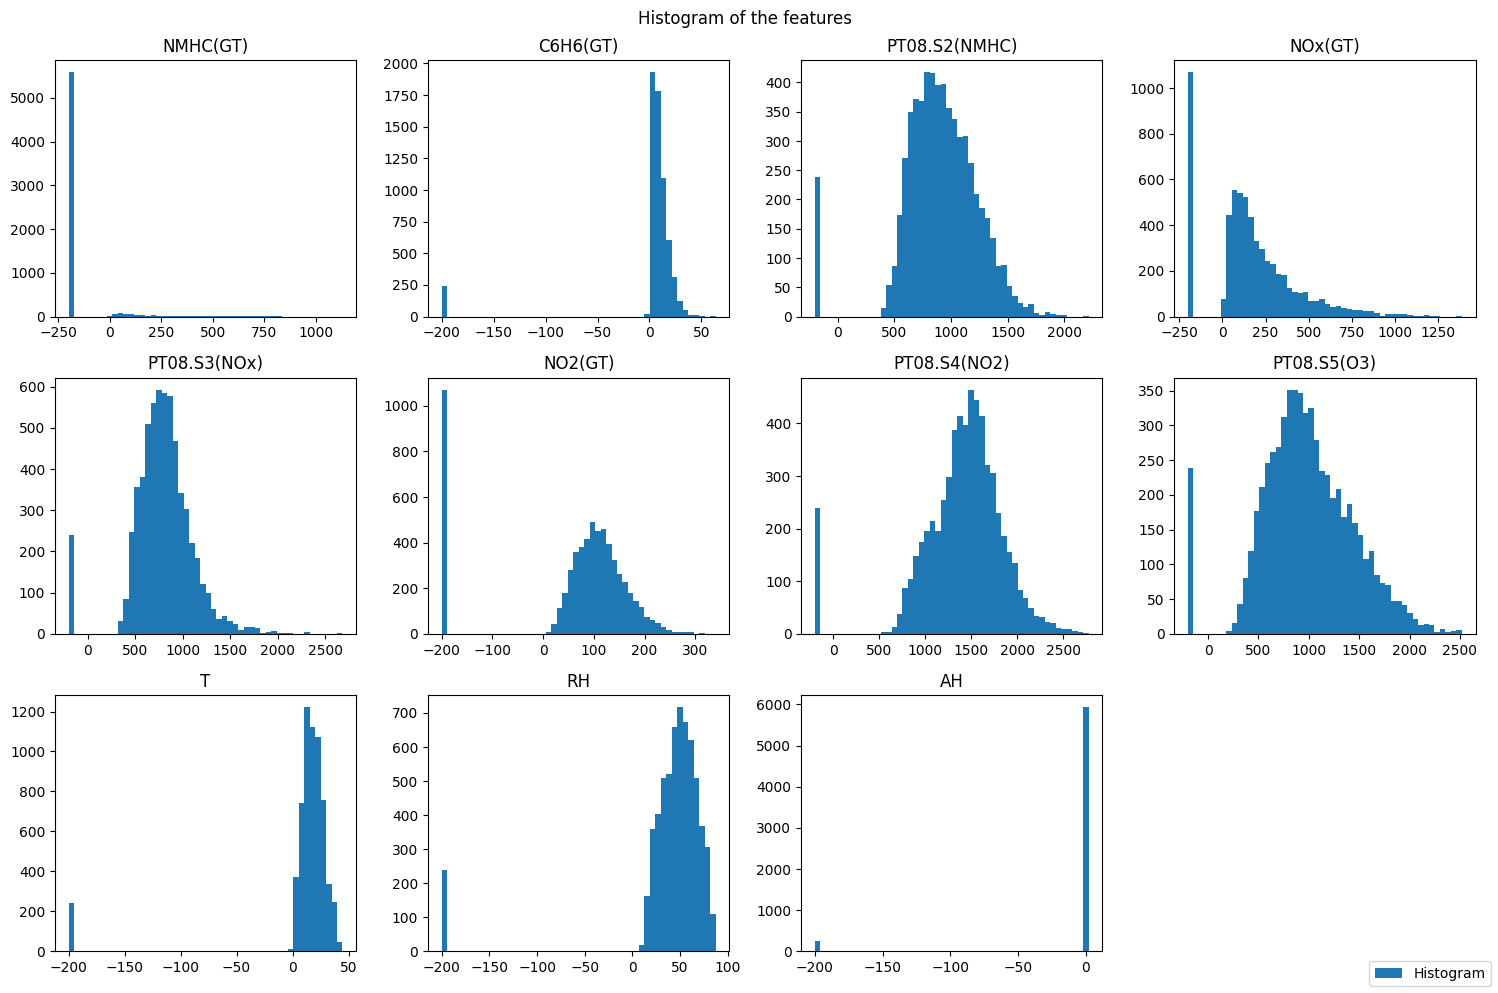

In [7]:
n_bins = 50
plot_histogram(features, n_bins=n_bins)

##### Verify if the Data Follows a Normal Distribution

To determine whether the data follows a normal distribution, we plot both the density plot and the normal distribution curve based on the data's mean and standard deviation. The density value of bin $i$ is calculated as $d_i = \frac{c_i}{(\sum^k_1 c_i) \cdot w}$, where $c_i$ is the count/frequency of data in bin $i$, and $w$ is the width of the bin.

The normal distribution is calculated using the following equation:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$
where $\mu$ and $\sigma$ are the mean and standard deviation of data $x$, respectively.

Upon examining the plot, it appears that for all 11 features, most data distributions are skewed towards the right, indicating that they do not follow a normal distribution.


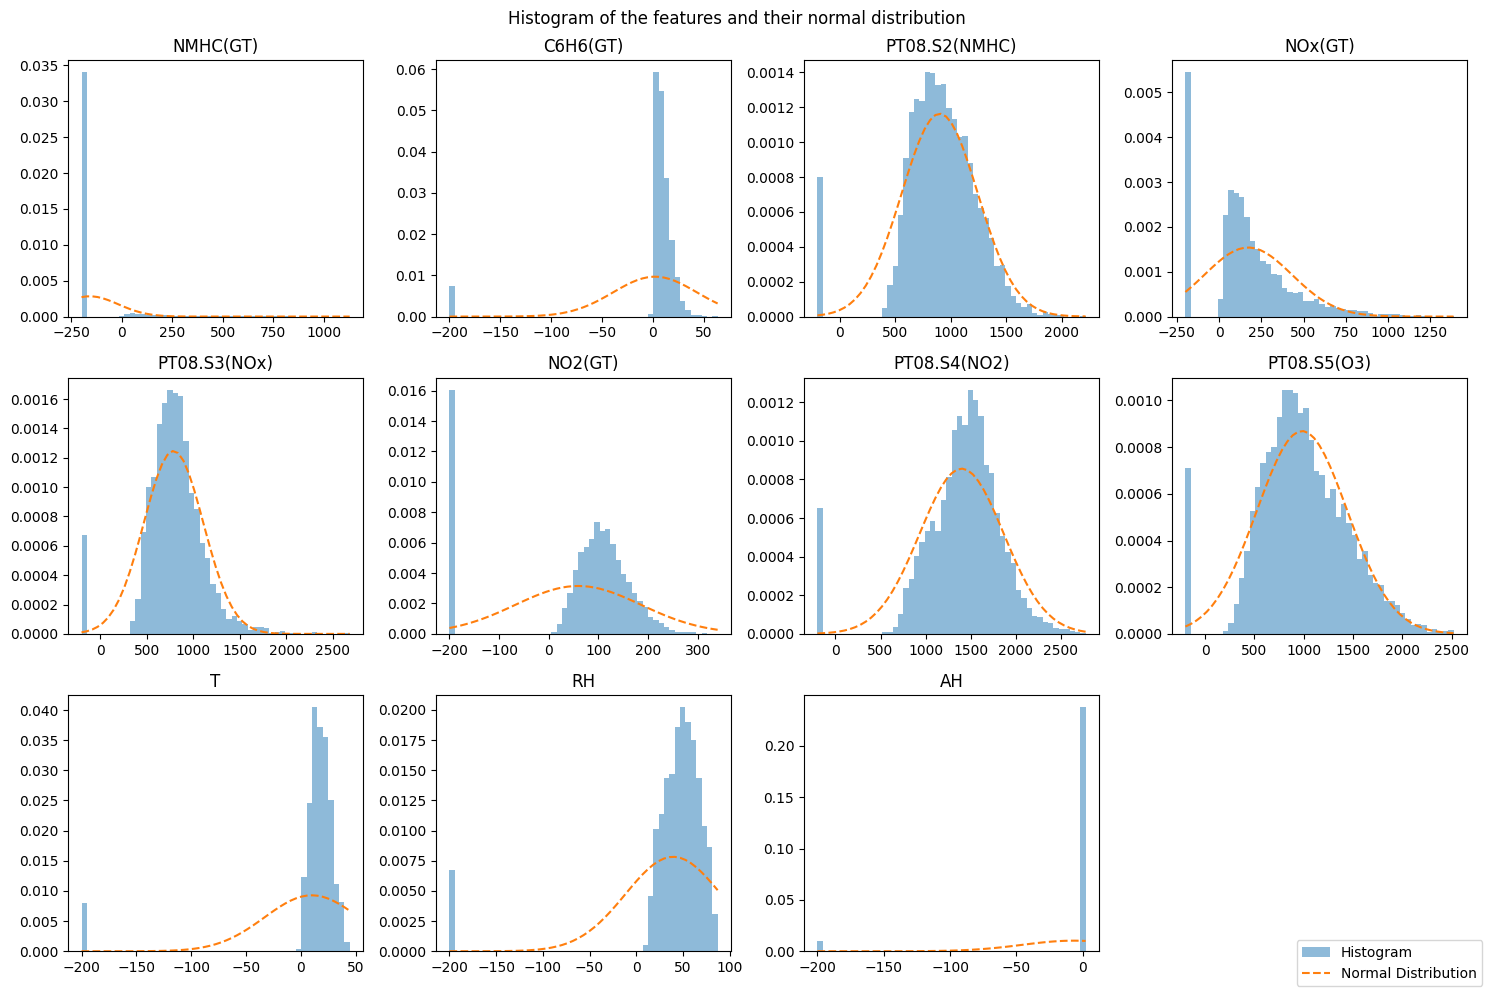

In [8]:
plot_histogram(features, with_normal_distribution=True)

##### Check for Outliers in the Data

To determine whether the data contains outliers, we use a boxplot to visualize the results and observe whether any points fall outside the $1.5 \times \text{IQR}$ range.

As we can see from the plot, there exists outliers in every features.

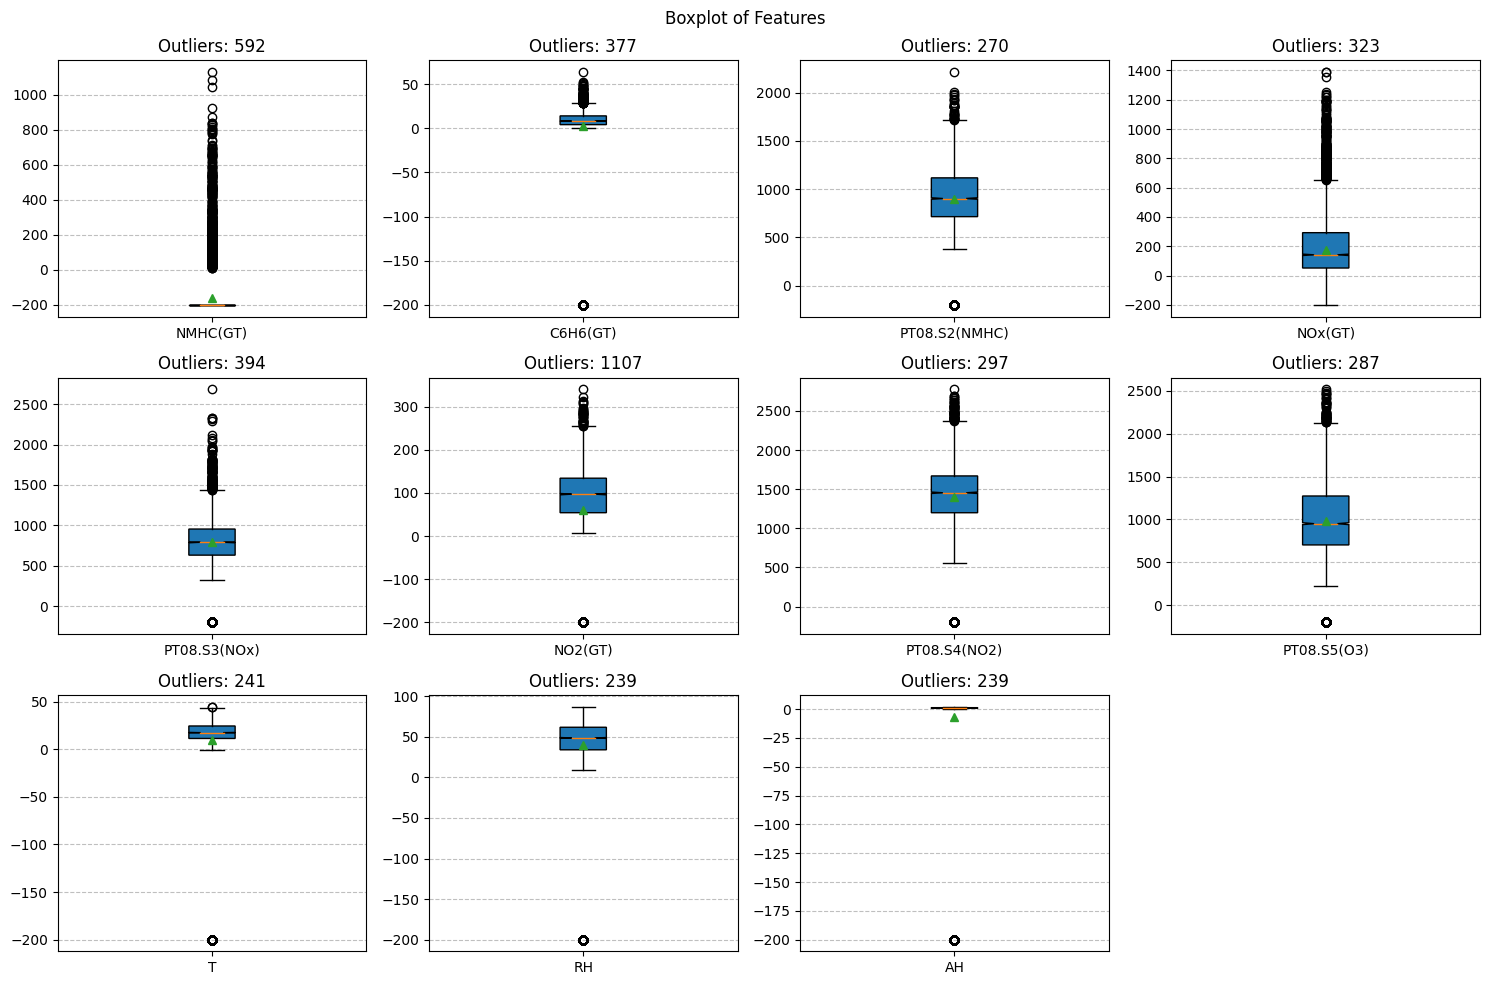

In [9]:
def plot_boxplot(features):
    num_features = features.shape[1]
    feature_columns = features.columns
    plot_columns = 4
    plot_rows = num_features // plot_columns + (0 if num_features % plot_columns == 0 else 1)
    fig, axes = plt.subplots(plot_rows, plot_columns, figsize=(15, 10), squeeze=False)  # Ensure axes is always 2D

    for i in range(num_features):
        row = i // plot_columns
        col = i % plot_columns

        # check the number of outliers
        q1 = features.iloc[:, i].quantile(0.25)
        q3 = features.iloc[:, i].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((features.iloc[:, i] < lower_bound) | (features.iloc[:, i] > upper_bound)).sum()

        # plot the boxplot
        axes[row, col].boxplot(features.iloc[:, i], notch=True, patch_artist=True, showmeans=True)
        axes[row, col].set_title("Outliers: {}".format(num_outliers))
        axes[row, col].set_xticklabels([feature_columns[i]])
        axes[row, col].yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

    # Remove the empty subplots
    for i in range(num_features, plot_rows * plot_columns):
        row = i // plot_columns
        col = i % plot_columns
        fig.delaxes(axes[row, col])

    plt.suptitle("Boxplot of Features")
    plt.tight_layout()
    plt.show()

plot_boxplot(features)

##### Data Normalization

There are four common data normalization techniques: scaling to a range, clipping, log scaling, and z-score normalization. Since we observe many outliers in all the features, along with a rightward shift in the data distribution compared to the normal distribution, we can initially apply clipping to manage the outliers and then convert the data into its z-score for standardization.

Here, we clip the value if it is not within the 5th to 95th percentile range of the original data. The z-score is calculated using the equation: $z = \frac{x - \mu}{\sigma}$.

In [10]:
def normalization(data, percentile=0.05, return_params=False):

    # clip the data to remove extreme outliers
    lower_bound = data.quantile(percentile)
    upper_bound = data.quantile(1 - percentile)
    data = np.clip(data, lower_bound, upper_bound)

    # normalize the data
    mean = data.mean()
    std = data.std()
    normalized_data = (data - mean) / std
    if return_params:
        return normalized_data, (mean, std)
    return normalized_data


Normalized Features: (6173, 11)


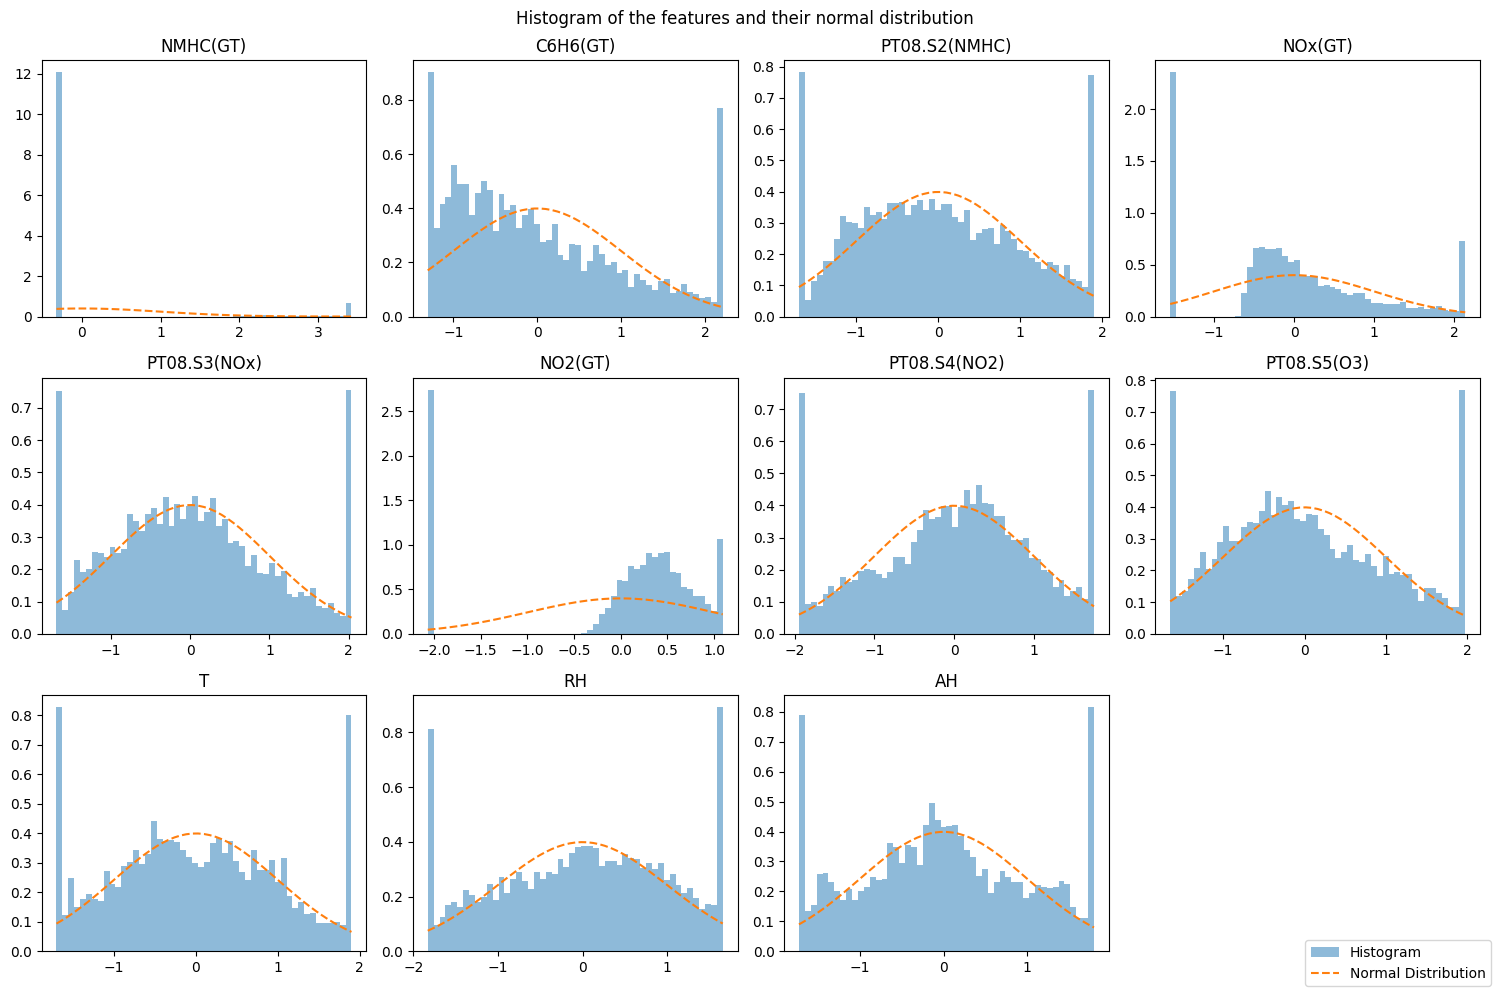

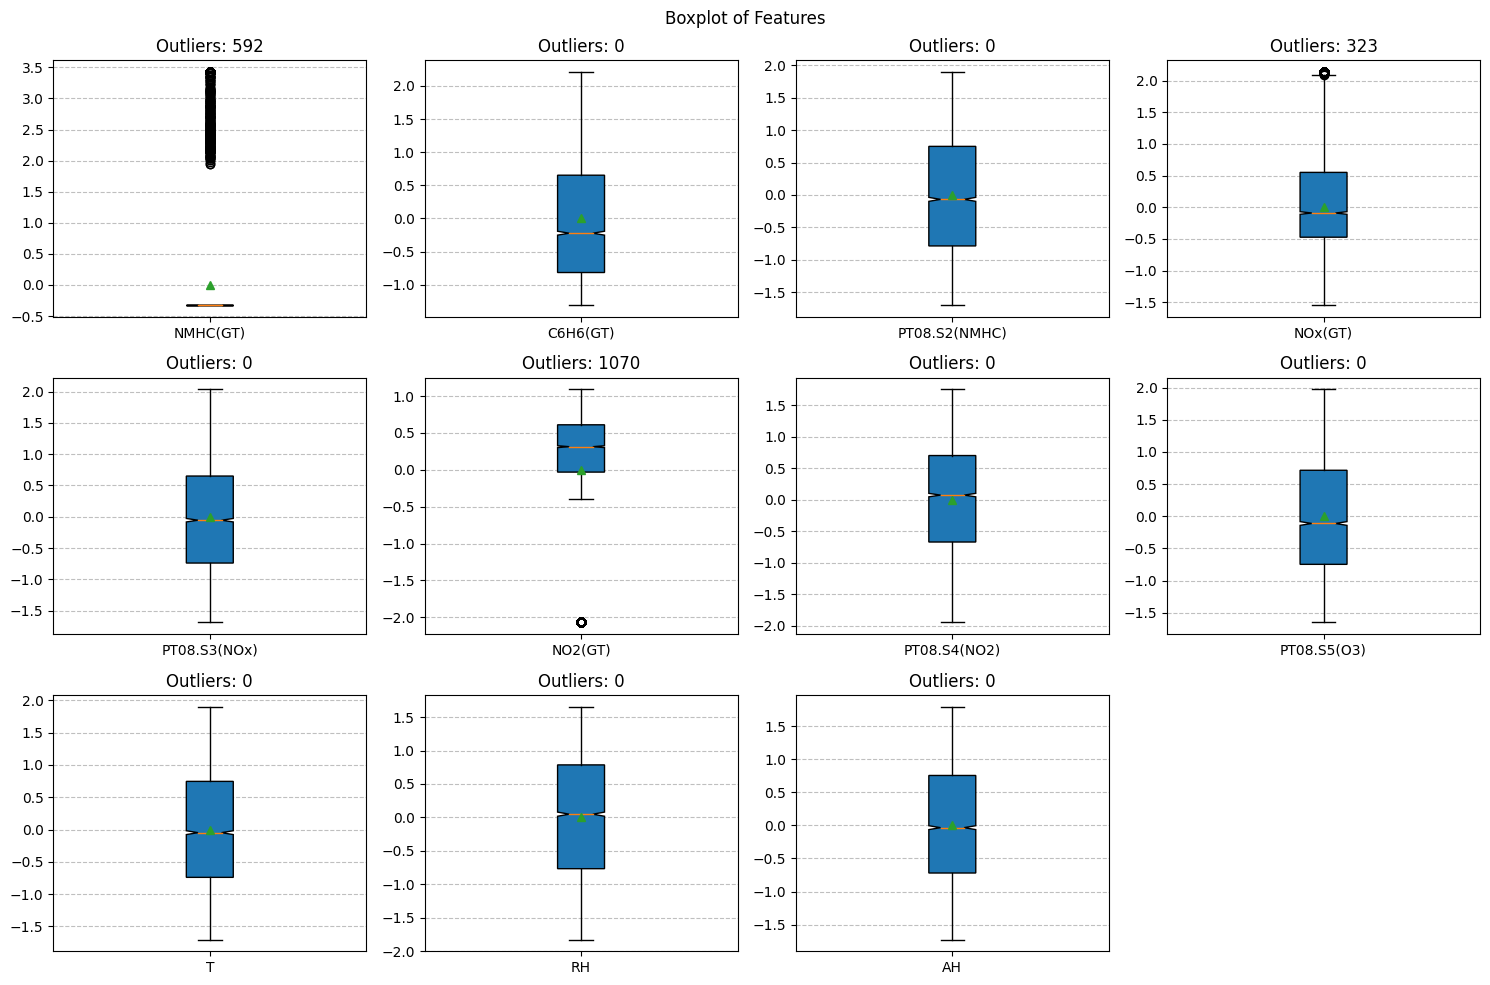

In [11]:
# normalize the features
normalized_features = pd.DataFrame()
for col in features.columns:
    normalized_features[col] = normalization(features[col])

print("Normalized Features: {}".format(normalized_features.shape))

plot_histogram(normalized_features, n_bins=n_bins, with_normal_distribution=True)
plot_boxplot(normalized_features)

#### 2. Pick 2 features and create a scatter plot to illustrate the correlation between these two features. Is there a high correlation between these features?

##### Show the correlation between two features

Correlation between two features is calculated by:
$$
Cor(X,Y) = \frac{\sum^n_{i=1} (x_i - \bar x)(y_i - \bar y)}{\sqrt{\sum^n_{i=1} (x_i - \bar x)^2}\sqrt{\sum^n_{i=1} (y_i - \bar y)^2}}
$$

Here, we select 'PT08.S2(NMHC)' and 'PT08.S4(NO2)'. As observed from the scatter plot and a correlation value of 0.875, we can conclude that 'PT08.S2(NMHC)' and 'PT08.S4(NO2)' exhibit a high correlation.

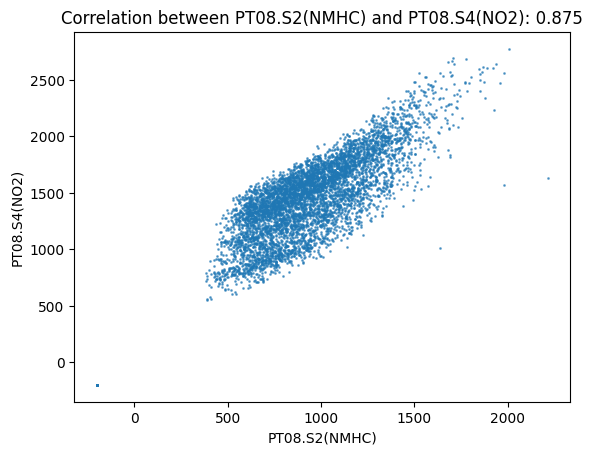

In [12]:
def show_correlation_matrix(df, col1, col2):
    data1 = df[col1].to_numpy()
    data2 = df[col2].to_numpy()
    a = np.sum((data1 - np.mean(data1)) * (data2 - np.mean(data2)))
    b = np.sqrt(np.sum((data1 - np.mean(data1)) ** 2) * np.sum((data2 - np.mean(data2)) ** 2))
    correlation = a / b

    correlation = df[col1].corr(df[col2])
    plt.title("Correlation between {} and {}: {:.3f}".format(col1, col2, correlation))
    
    plt.scatter(df[col1], df[col2], alpha=0.6, s=1)
    plt.xlabel(col1)
    plt.ylabel(col2)


col1 = "PT08.S2(NMHC)"
col2 = "PT08.S4(NO2)"
show_correlation_matrix(train_df, col1, col2)

#### 3. Compute the Pearson’s correlation between all pairs of variables 1-12. Assign the resulting correlation values in a 12x12 matrix C, whose (i; j) element represents the correlation value between variables i and j, i.e., C(i; j) = corr(i; j). Visualize the resulting matrix C with a heatmap and discuss potential associations between the considered variables. Note: You can use the ‘heatmap’ function from ‘seaborn’.

<Axes: >

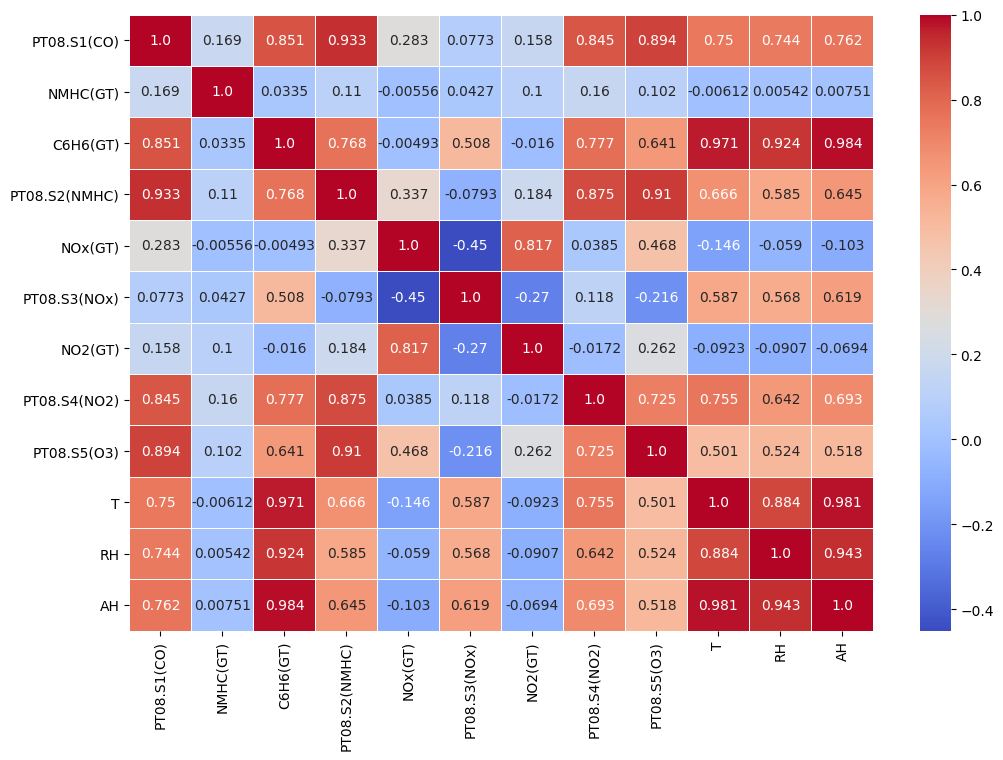

In [13]:
from seaborn import heatmap

# calculate Pearson's correlation matrix
corr_matrx = train_df.corr()
plt.figure(figsize=(12,8))
heatmap(corr_matrx, cmap="coolwarm", annot=True, linewidth=0.5, fmt="0.3")

According to the heatmap, we can observe that NMHC(GT) has little to no correlation with the other features, suggesting it may not be a strong predictor for our target variable, PT08.S1(CO). The correlation matrix shows that our target variable has a strong positive correlation with features such as C6H6(GT), PT08.S2(NMHC), PT08.S4(NO2), PT08.S5(O3), T, RH, and AH. This indicates that these features could be significant contributors to the prediction of PT08.S1(CO). Furthermore, most features demonstrate a positive correlation with the target variable, while PT08.S3(NOx) and NOx(GT) display a negative correlation. This negative correlation indicates an inverse relationship with the target variable, where increases in these features are associated with decreases in PT08.S1(CO).

### (c) Linear Regression Implementation (20 points)

Implement a linear regression model from scratch to regress the target variable, Carbon monoxide (CO). (Remember: You can not use any libraries for the linear regression model.)

##### Dataset and Dataloader

I split the data into training and testing sets using a train-to-test ratio of 8:2.

In [14]:
class Dataset:
    def __init__(self, features, label, ratio=0.8):
        self.features = features
        self.label = label

        self.ratio = ratio
        self.num_samples = features.shape[0]
        self.num_train_samples = int(ratio * self.num_samples)
        self.num_test_samples = self.num_samples - self.num_train_samples
        
        self.train_indices = np.random.choice(self.num_samples, self.num_train_samples, replace=False)
        self.test_indices = np.array([i for i in range(self.num_samples) if i not in self.train_indices])

        print("Number of training samples: {}".format(self.num_train_samples))
        print("Number of test samples: {}".format(self.num_test_samples))
    
    def get_data(self, is_train=True):
        indices = self.train_indices if is_train else self.test_indices
        return self.features.iloc[indices], self.label.iloc[indices]
            
class DataLoader_Linear:
    def __init__(self, dataset):
        self.train_loader = dataset.get_data(is_train=True)
        self.test_loader = dataset.get_data(is_train=False)

##### Linear Regression Model

In this section, we design a linear regression model. According to the definition of the linear regression algorithm, we define our model as:

$$
\hat y = WX + b
$$

, where $W$ and $b$ are the coefficients. Our goal is to find the best $W$ and $b$ that minimize the Mean Square Error (MSE) between the actual labels $y$ and the predicted labels $\hat y$.

$$
MSE = \frac{1}{n}\sum^n_{i=1} (y_i - \hat y_i)^2 = \frac{1}{n}\sum^n_{i=1} (y_i - (WX_i+b))^2
$$

To find the minimum of $RSS$, we compute the partial derivatives with respect to $W$ and $b$ to find the gradient descent direction. 
$$
dW = \frac{\partial}{\partial W}{\frac{1}{n}\sum^n_{i=1} (y_i - (WX_i+b))^2} = \frac{2}{n}\sum^n_{i=1}(-X_i)(y_i - (WX_i+b))\\ = \frac{-2}{n}\sum^n_{i=1}X_i(y_i - \hat y_i)
$$
$$
db = \frac{\partial}{\partial b}{\frac{1}{n}\sum^n_{i=1} (y_i - (WX_i+b))^2} = \frac{-2}{n}\sum^n_{i=1}(y_i - \hat y_i)
$$

We update the gradient with learning rate $\alpha$: 
$$
W =  W - \alpha \cdot dW \\
b =  b - \alpha \cdot db
$$

Before feeding the data into the model, we should first normalize both the features and the label. Here, I use the z-score to normalize each feature of the input data $X$ and label. The z-score is calculated by:
$$
z_i = \frac{x_i - \mu_i}{\sigma_i}
$$
where $x_i$  is the value of feature $i$ and $\mu_i, \sigma_i$ are the mean and standard deviation of the training data, respectively. The mean and standard deviation of the original training features and label are recorded in the model upon calling the fit() function. This information is retained so that during inference time, we can apply the same normalization to $X_{test}$ and denormalize the output to produce the actual $\hat y_o$ value:
$$
\hat y_o =  \hat y \times \sigma_y + \mu_y 
$$ 

For weight initialization, I use Zero Initialization, that is setting $W$ and $b$ to 0 initially.

In [15]:
class LinearRegression:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.X_mean = None
        self.X_std = None
        self.y_mean = None
        self.y_std = None
    
    def normalization(self, features, percentile=0.05):
        if isinstance(features, pd.Series):
            return normalization(features, percentile=percentile, return_params=True)
        
        normalized_features = pd.DataFrame()
        X_mean = pd.Series()
        X_std = pd.Series()
        for col in features.columns:
            normalized_data, (mean, std) = normalization(features[col], percentile=percentile, return_params=True)
            normalized_features[col] = normalized_data
            X_mean[col] = mean
            X_std[col] = std
        return normalized_features, (X_mean, X_std)

    def fit(self, X, y, learning_rate=1e-3, epochs=10000, verbose=False, show_graph=False):
        X, (self.X_mean, self.X_std) = self.normalization(X, percentile=0)
        y, (self.y_mean, self.y_std) = self.normalization(y, percentile=0)

        if show_graph:
            from IPython.display import clear_output
            plt.ion()  # Turn on interactive mode
            plt.subplots(figsize=(10, 6))

        # Plotting setup
        losses = []
        epoch_count = []

        for epoch in range(epochs):
            y_pred = X.dot(self.weights) + self.bias

            loss = self.loss_function(y, y_pred)
            losses.append(loss)  
            epoch_count.append(epoch)

            # calculate the gradients
            dW = -2 * X.T.dot(y - y_pred) / X.shape[0] # df/dW = -2X(y - (WX + b))/N
            db = -2 * (y - y_pred)/ X.shape[0] # df/db = -2(y - (WX + b))/N

            # update the weights and bias
            self.weights -= learning_rate * dW
            self.bias -= learning_rate * db.mean()

            if verbose and epoch % 1000 == 0:
                print("Epoch: {}, Loss: {:.3f}".format(epoch, loss))

            # Update the plot every 100 epochs
            if show_graph and epoch % 100 == 0:
                clear_output(wait=True)
                plt.figure(figsize=(10, 6))
                plt.scatter(epoch_count, losses, c='b', s=1)
                plt.xlabel("Epoch")
                plt.ylabel("Loss")
                plt.title("Training Loss")
                plt.show()
                plt.pause(0.05)
            
        if verbose:
            plt.show()

    def loss_function(self, y, y_pred):
        # calculate the mean squared error
        return np.mean((y - y_pred) ** 2) # f(W, b) = 1/N * sum((y - (WX + b))^2)

    def load_model(self, path):
        npz = np.load(path)
        self.weights = npz["weights"]
        self.bias = npz["bias"]
        self.X_mean = npz["X_mean"]
        self.X_std = npz["X_std"]
        self.y_mean = npz["y_mean"]
        self.y_std = npz["y_std"]
        
    
    def predict(self, X):
        # normalize the features
        X = (X - self.X_mean) / self.X_std
        # y = WX + b
        y_pred = X.dot(self.weights) + self.bias
        # denormalize the prediction
        y_pred = y_pred * self.y_std + self.y_mean
        return y_pred
    
    def save(self, config):
        state_dict = {
            "weights": self.weights,
            "bias": self.bias,
            "X_mean": self.X_mean,
            "X_std": self.X_std,
            "y_mean": self.y_mean,
            "y_std": self.y_std,
            "config": config
        }
        np.savez(config["ckpt_path"], **state_dict)  

In [16]:
# create the dataset
dataset = Dataset(features, label)

Number of training samples: 4938
Number of test samples: 1235


##### Train the model

We train the linear model with the following hyperparameters:
* $\alpha$: $1\times e^{-4}$
* number of iterations (epochs): 20000

The trained model will be saved in ./checkpoints/linear_model.npz

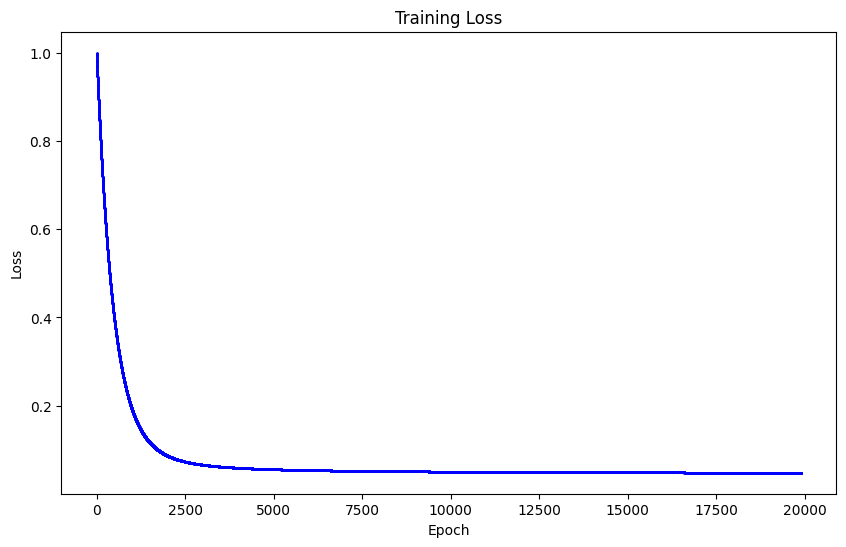

In [17]:
# train the model
linear_config = {
    "name": "Linear Regression",
    "lr": 1e-4,
    "epochs": 20000,
    "ckpt_path": "{}/linear_model.npz".format(ckpt_dir)
}

linear_model = LinearRegression(num_features)
linear_loader = DataLoader_Linear(dataset)
train_data, train_label = linear_loader.train_loader
linear_model.fit(train_data, train_label, learning_rate=linear_config["lr"], epochs=linear_config["epochs"], verbose=True, show_graph=True)
linear_model.save(linear_config)

##### Evaluate the model

We evaluate the model's performance with the test data and plot the relationship between the predicted value $\hat y_o$ and the ground truth value $y$.

Test Loss: 5247.544296514053


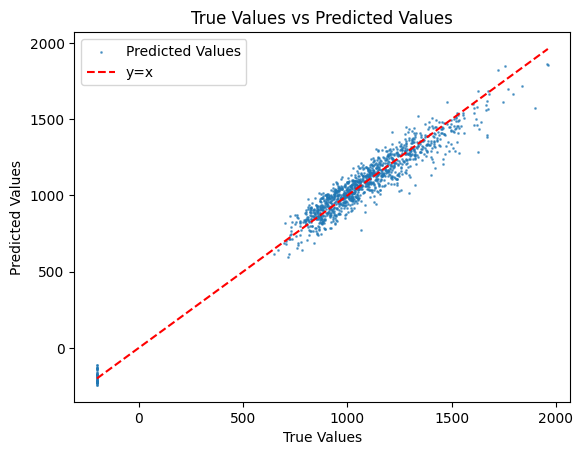

In [18]:
# evaluate the model
linear_model.load_model(linear_config["ckpt_path"])
test_data, test_label = linear_loader.test_loader

y_pred = linear_model.predict(test_data)
test_loss = linear_model.loss_function(test_label, y_pred)
print("Test Loss: {}".format(test_loss))

# plot the predicted values against the true values
plt.scatter(test_label, y_pred, alpha=0.6, s=1, label="Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs Predicted Values")


# plot the line y = x
x = np.linspace(test_label.min(), test_label.max(), 100)
plt.plot(x, x, color="r", linestyle="--", label="y=x")
plt.legend()
plt.show()



### (d) Logistic Regression Implementation (20 points)

Using the column PT08.S1(CO), create a binary label for this dataset where the values more than 1000 correspond to label 1 and the values less than or equal to 1000 correspond to label 0. Implement a logistic regression model from scratch to predict this binary label. (Remember: You can not use any libraries for the logistic regression model.)

##### Dataloader

I use the same train-test split data but load it with another dataloader that accepts a threshold value $\delta$ that binarize the value of PT08.S1(CO), i.e. $y$:

$$
    y_p=
    \begin{cases}
      1, & \text{if}\ y > \delta \\
      0, & \text{otherwise}
    \end{cases}
$$

In our case, we set $\delta = 1000$.

In [19]:
class DataLoader_Logistic:
    def __init__(self, dataset, threshold=1000):
        train_features, train_label = dataset.get_data(is_train=True)

        test_features, test_label = dataset.get_data(is_train=False)

        # binarize the label
        train_label = (train_label > threshold).astype(int)
        test_label = (test_label > threshold).astype(int)

        self.train_loader = (train_features, train_label)
        self.test_loader = (test_features, test_label)

##### Logistic Regression Model

In this section, we design the logistic regression model. According to the definition of the linear regression algorithm, we define our model as:

$$
\hat y = \sigma(z) = \frac{1}{1 + e^{-(z)}}, \text{ where } z = WX + b
$$

, where $W$ and $b$ are the coefficients. For logistic regression model, we use the negative log likelihood function ($NLL$) as the metric that we want to optimize.

$$
NLL = \frac{-1}{n}\sum^n_{i=1} (y_i \log \sigma(WX+b) + (1-y_i)\log(1-\sigma(WX+b)))
$$

To find the minimum of $NLL$, we compute the partial derivatives with respect to $W$ and $b$ to find the gradient descent direction. 

First we have:
$$
\sigma(z) = \frac{1}{1 + e^{-(z)}}, \quad \sigma(z)' = \sigma(z)(1-\sigma(z))
$$
Next we can calculate:
$$
dW = \frac{\partial}{\partial W}{\frac{-1}{n}\sum^n_{i=1} (y_i \log \sigma(z) + (1-y_i)\log(1-\sigma(z)))} \\
    = \frac{-1}{n}\sum^n_{i=1}(\frac{y_i}{\sigma(z)} - \frac{1-y_i}{1-\sigma(z)})\frac{\partial}{\partial W} \sigma(z) \\
    = \frac{-1}{n}\sum^n_{i=1}(\frac{y_i}{\sigma(z)} - \frac{1-y_i}{1-\sigma(z)})\times (\sigma(z)(1-\sigma(z))) \times \frac{\partial z}{\partial W} \\
    = \frac{-1}{n}\sum^n_{i=1}(y_i(1-\sigma(z)) - \sigma(z)(1-y_i))\frac{\partial z}{\partial W} \\
    = \frac{-1}{n}\sum^n_{i=1}(y_i - \sigma(z))X_i
$$

Similarly, for $db$:
$$
db = \frac{\partial}{\partial b}{\frac{-1}{n}\sum^n_{i=1} (y_i \log \sigma(z) + (1-y_i)\log(1-\sigma(z)))} \\
   = \frac{-1}{n}\sum^n_{i=1}(y_i - \sigma(z))
$$

We update the gradient with learning rate $\alpha$: 
$$
W =  W - \alpha \cdot dW \\
b =  b - \alpha \cdot db
$$

Before feeding the data into the model, we only need to normalize the features as the label is already in the range within 0 and 1. I use the z-score to normalize each feature of the input data $X$ and label. The z-score is calculated by:
$$
z_i = \frac{x_i - \mu_i}{\sigma_i}
$$
where $x_i$  is the value of feature $i$ and $\mu_i, \sigma_i$ are the mean and standard deviation of the training data, respectively. The mean and standard deviation of the original training features are recorded in the model upon calling the fit() function. This information is retained so that during inference time, we can apply the same normalization to $X_{test}$.

For weight initialization, I use Zero Initialization, that is setting $W$ and $b$ to 0 initially.

In [20]:
class LogisticRegression:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.X_mean = None
        self.X_std = None
    
    def normalization(self, features, percentile=0.05):
        if isinstance(features, pd.Series):
            return normalization(features, percentile=percentile, return_params=True)
        
        normalized_features = pd.DataFrame()
        X_mean = pd.Series()
        X_std = pd.Series()
        for col in features.columns:
            normalized_data, (mean, std) = normalization(features[col], percentile=percentile, return_params=True)
            normalized_features[col] = normalized_data
            X_mean[col] = mean
            X_std[col] = std
        return normalized_features, (X_mean, X_std)
    

    def fit(self, X, y, learning_rate=1e-3, epochs=50000, verbose=False, show_graph=False):
        # preprocessing the data
        X, (self.X_mean, self.X_std) = self.normalization(X, percentile=0)

        # Initialize the plot
        if show_graph:
            from IPython.display import clear_output
            # Initialize the plot
            plt.ion()  # Turn on interactive mode
            plt.subplots(figsize=(10, 6))
            
        # Plotting setup
        losses = []
        epoch_count = []

        for epoch in range(epochs):
            _y_pred = X.dot(self.weights) + self.bias
            y_pred = 1/(1 + np.exp(-(_y_pred))) # \sigma(WX + b)

            loss = self.loss_function(y, y_pred)
            losses.append(loss)
            epoch_count.append(epoch)
            
            # calculate the gradients
            dW = -X.T.dot(y - y_pred) / X.shape[0]
            db = - (y - y_pred).mean()


            # update the weights and bias
            self.weights -= learning_rate * dW
            self.bias -= learning_rate * db.mean()

            if verbose and epoch % 1000 == 0:
                print("Epoch: {}, Loss: {:.3f}".format(epoch, loss))

            # Update the plot every 100 epochs
            if show_graph and epoch % 100 == 0:
                clear_output(wait=True)
                plt.figure(figsize=(10, 6))
                plt.scatter(epoch_count, losses, c='b', s=1)
                plt.xlabel("Epoch")
                plt.ylabel("Loss")
                plt.title("Training Loss")
                plt.show()
                plt.pause(0.05)

        if verbose:
            plt.show()

    def loss_function(self, y_true, y_pred):
        # negative log likelihood
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def load_model(self, path):
        npz = np.load(path)
        self.weights = npz["weights"]
        self.bias = npz["bias"]
        self.X_mean = npz["X_mean"]
        self.X_std = npz["X_std"]

    def predict(self, X):
        # normalize the features
        X = (X - self.X_mean) / self.X_std
        y_pred = X.dot(self.weights) + self.bias
        return 1 / (1 + np.exp(-y_pred))
    
    def save(self, config):
        state_dict = {
            "weights": self.weights,
            "bias": self.bias,
            "X_mean": self.X_mean,
            "X_std": self.X_std,
            "config": config
        }
        np.savez(config["ckpt_path"], **state_dict)  

##### Train the model

We train the logistic model with the following hyperparameters:
* $\alpha$: $1\times e^{-3}$
* number of iterations (epochs): 50000

The trained model will be saved in ./checkpoints/logistic_model.npz

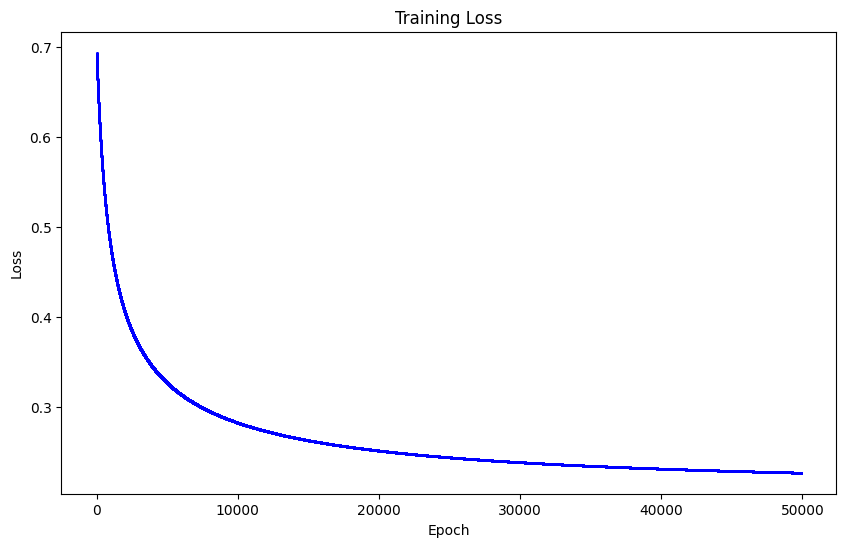

In [21]:

# train the model
logistic_config = {
    "name": "Logistic Regression",
    "lr": 1e-3,
    "epochs": 50000,
    "threshold": 1000,
    "ckpt_path": "{}/logistic_model.npz".format(ckpt_dir)
}

logistic_model = LogisticRegression(num_features)
loader = DataLoader_Logistic(dataset, threshold=logistic_config["threshold"])
train_data, train_label = loader.train_loader
logistic_model.fit(train_data, train_label, learning_rate=logistic_config["lr"], epochs=logistic_config["epochs"], verbose=True, show_graph=True)
logistic_model.save(logistic_config)

##### Evaluate the model

We evaluate the model's performance on the test data and plot the ROC curve with its AUC value.

Logistic Regression Test Loss: 0.227
AUC: 0.970


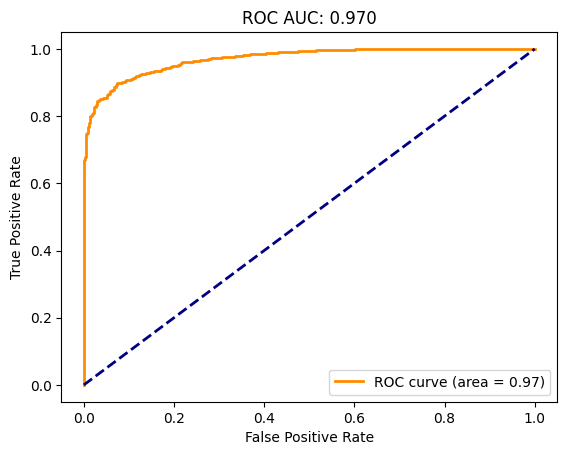

In [22]:
# evaluate the model
logistic_model.load_model(logistic_config["ckpt_path"])
test_data, test_label = loader.test_loader

y_pred = logistic_model.predict(test_data)
test_loss = logistic_model.loss_function(test_label, y_pred)
print("Logistic Regression Test Loss: {:.3f}".format(test_loss))
print("AUC: {:.3f}".format(roc_auc_score(test_label, y_pred)))
print("=================================================================================")

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(test_label, y_pred)
roc_auc = roc_auc_score(test_label, y_pred)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC: {:.3f}'.format(roc_auc))
plt.legend(loc="lower right")
plt.show()


##### Find the optimal threshold

In this section, I find the optimum by selecting the threshold that yields the maximum difference between TPR (True Positive Rate) and FPR (False Positive Rate). I calculated the accuracy at this threshold and also plotted the confusion matrix to display the number of True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN).

Best Threshold: 0.566, Accuracy: 0.908
Best True Positive Rate: 0.898
Best False Positive Rate: 0.075


Text(0.5, 1.0, 'Confusion Matrix')

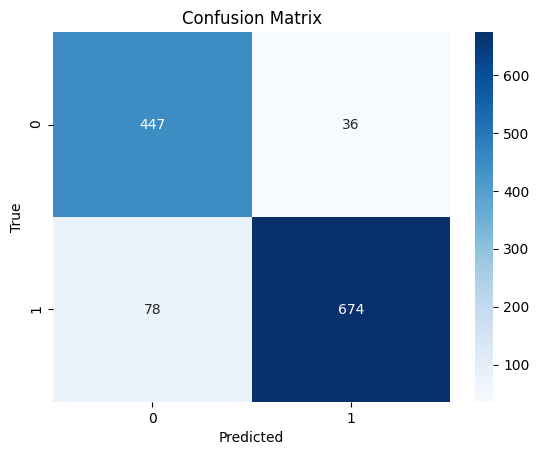

In [23]:
best_threshold = thresholds[np.argmax(tpr - fpr)]
best_tpr = tpr[np.argmax(tpr - fpr)]
best_fpr = fpr[np.argmax(tpr - fpr)]
accuracy = np.mean((y_pred > best_threshold) == test_label)

print("Best Threshold: {:.3f}, Accuracy: {:.3f}".format(best_threshold, accuracy))
print("Best True Positive Rate: {:.3f}".format(best_tpr))
print("Best False Positive Rate: {:.3f}".format(best_fpr))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (y_pred > best_threshold).astype(int)
conf_matrix = confusion_matrix(test_label, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")


### (e) Result Analysis - Linear Regression (10 points) 

Perform a 5-fold cross validation. Compute RMSE for each validation set across 5 folds. Report average and standard deviation of RMSE values. Do you see a big change across different folds? How can you use the coefficient of this model to find the most informative features?

##### Dataset and Dataloader

Here we split our training data into $k=5$ sections by randomly permuting the indices and then iteratively select each slice according to the fold size, which is $\frac{n}{k}$. In the dataloader, I provide the get_fold(i) function that return the train and validating data by choosing the section $i$ as our validation set while using the remaining four as our training set.

In [24]:
class CrossValidation_Dataset:
    def __init__(self, features, label, folds=5):
        self.features = features
        self.label = label

        self.num_samples = features.shape[0]
        self.fold_size = self.num_samples // folds
        self.indices = np.random.permutation(self.num_samples)
        self.folds = [self.indices[i * self.fold_size: (i + 1) * self.fold_size] for i in range(folds)]

    def get_data(self, indices):
        return self.features.iloc[indices], self.label.iloc[indices]
    
class CrossValidation_Dataloader_Linear:
    def __init__(self, dataset: CrossValidation_Dataset):
        self.dataset = dataset
        self.folds = dataset.folds
        self.num_samples = dataset.num_samples
        self.num_folds = len(self.folds)

        
    def get_fold(self, fold_index):
        val_indices = self.folds[fold_index]
        train_indices = np.array([i for i in range(self.num_samples) if i not in val_indices])

        train_features, train_label = self.dataset.get_data(train_indices)
        val_features, val_label = self.dataset.get_data(val_indices)

        return (train_features, train_label), (val_features, val_label)


In [25]:
n_folds = 5
cv_dataset = CrossValidation_Dataset(features, label, folds=n_folds)

##### Train the model

In [26]:
# train the model
cv_loader_linear = CrossValidation_Dataloader_Linear(cv_dataset)

rmse_losses = []
for i in range(cv_loader_linear.num_folds):
    print("Traing on fold {}:".format(i))
    linear_model_cv = LinearRegression(num_features)

    (train_data, train_label), (val_data, val_label) = cv_loader_linear.get_fold(i)
    linear_model_cv.fit(train_data, train_label, learning_rate=linear_config["lr"], epochs=linear_config["epochs"], verbose=True)
    
    y_pred = linear_model_cv.predict(val_data)

    val_loss = linear_model_cv.loss_function(y_pred, val_label)
    rmse = np.sqrt(val_loss)
    rmse_losses.append(rmse)
    print("=================================================================================")

rmse_losses = np.array(rmse_losses)


Traing on fold 0:
Epoch: 0, Loss: 1.000
Epoch: 1000, Loss: 0.196
Epoch: 2000, Loss: 0.090
Epoch: 3000, Loss: 0.069
Epoch: 4000, Loss: 0.062
Epoch: 5000, Loss: 0.059
Epoch: 6000, Loss: 0.057
Epoch: 7000, Loss: 0.055
Epoch: 8000, Loss: 0.054
Epoch: 9000, Loss: 0.054
Epoch: 10000, Loss: 0.053
Epoch: 11000, Loss: 0.053
Epoch: 12000, Loss: 0.052
Epoch: 13000, Loss: 0.052
Epoch: 14000, Loss: 0.052
Epoch: 15000, Loss: 0.051
Epoch: 16000, Loss: 0.051
Epoch: 17000, Loss: 0.051
Epoch: 18000, Loss: 0.051
Epoch: 19000, Loss: 0.051
Traing on fold 1:
Epoch: 0, Loss: 1.000
Epoch: 1000, Loss: 0.191
Epoch: 2000, Loss: 0.086
Epoch: 3000, Loss: 0.066
Epoch: 4000, Loss: 0.059
Epoch: 5000, Loss: 0.055
Epoch: 6000, Loss: 0.053
Epoch: 7000, Loss: 0.052
Epoch: 8000, Loss: 0.051
Epoch: 9000, Loss: 0.051
Epoch: 10000, Loss: 0.050
Epoch: 11000, Loss: 0.049
Epoch: 12000, Loss: 0.049
Epoch: 13000, Loss: 0.049
Epoch: 14000, Loss: 0.049
Epoch: 15000, Loss: 0.048
Epoch: 16000, Loss: 0.048
Epoch: 17000, Loss: 0.048
Ep

##### Evaluate on the result

Epoch 0:
 - RMSE: 69.847
Epoch 1:
 - RMSE: 75.694
Epoch 2:
 - RMSE: 72.440
Epoch 3:
 - RMSE: 71.309
Epoch 4:
 - RMSE: 75.898
Average RMSE: 73.03737933937819 +- 2.3984637711277417


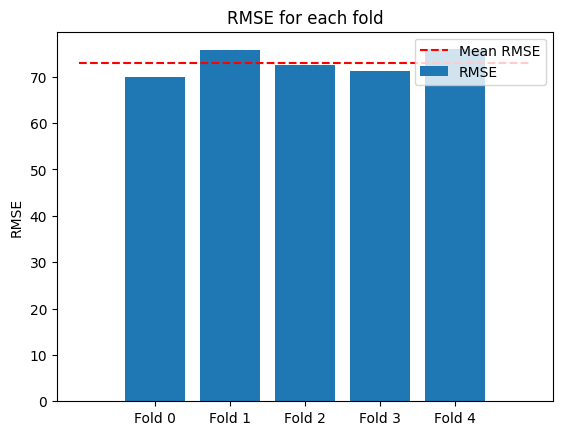

In [27]:
for i in range(n_folds):
    print("Epoch {}:".format(i))
    print(" - RMSE: {:.3f}".format(rmse_losses[i]))
    print("=================================================================================")
print("Average RMSE: {} +- {}".format(rmse_losses.mean(), rmse_losses.std()))
print("=================================================================================")

plt.bar(["Fold {}".format(i) for i in range(n_folds)], rmse_losses, label="RMSE")
plt.hlines(rmse_losses.mean(), -1, cv_loader_linear.num_folds, color="r", linestyle="--", label="Mean RMSE")
plt.ylabel("RMSE")
plt.title("RMSE for each fold")
plt.legend()
plt.show()

Together with the bar plot and the mean and standard deviation for the RMSE values, we can see that there is no big changes in RMSE across different folds.

##### Evaluate the coefficient

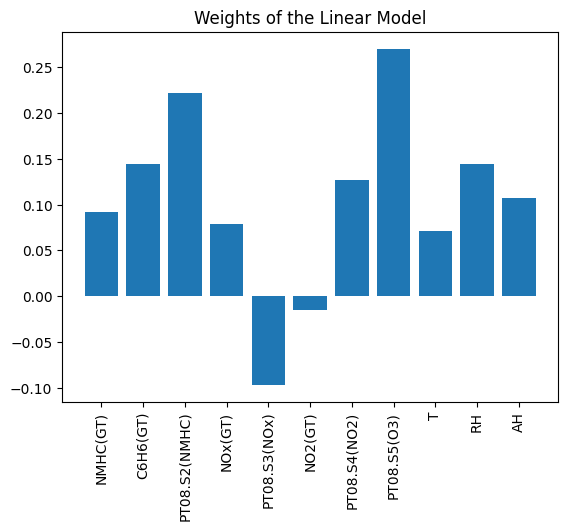

In [28]:
plt.bar(features.columns, linear_model.weights)
plt.xticks(rotation=90)
plt.title("Weights of the Linear Model")
plt.show()

Observing the plot, we can see that PT08.S2(NMHC) and PT08.S5(O3) have stronger magnitudes compared to all other features. This indicates a more substantial effect on the dependent variable, which is the value we are predicting (PT08.S1(CO)). Conversely, PT08.S3(NOx) has a negative coefficient, which implies a negative effect on the dependent variable. This suggests that if PT08.S3(NOx) increases, PT08.S1(CO) is likely to decrease.

### (f) Result Analysis - Logistic Regression (10 points) 

Perform a 5-fold cross validation. Compute accuracy, precision, recall, and F1 score for each validation set across 5 folds. Report the average and standard deviation of these metrics. Do you see a big change across different folds?

##### Dataloader

Here we follows the same manner of creating the dataloader based on the same dataset that section e uses. However, the only difference is that when getting the fold, we use the threshold to convert the target value, which is originally continuous, into binary labels.

In [29]:
class CrossValidation_Dataloader_Logistic(CrossValidation_Dataloader_Linear):
    def __init__(self, dataset, threshold=1000):
        super().__init__(dataset)
        self.threshold = threshold
        

    # override the get_fold method
    def get_fold(self, fold_index):
        (train_features, train_label), (test_features, test_label) = super().get_fold(fold_index)
        train_label = train_label.apply(lambda x: 1 if x > self.threshold else 0)
        test_label = test_label.apply(lambda x: 1 if x > self.threshold else 0)

        return (train_features, train_label), (test_features, test_label)


##### Train the model

In [30]:
# train the model
cv_loader_logistic = CrossValidation_Dataloader_Logistic(cv_dataset, threshold=logistic_config["threshold"])

roc_dir = "./logistic_roc_curves"
if not os.path.exists(roc_dir):
    os.makedirs(roc_dir)

fprs = []
tprs = []
aucs = []

optimal_thresholds = []
accuracies = []
precisions = []
recalls = []
f1_scores = []


for i in range(cv_loader_logistic.num_folds):
    print("Traing on fold {}:".format(i))
    logistic_model_cv = LogisticRegression(num_features)
    (train_data, train_label), (val_data, val_label) = cv_loader_logistic.get_fold(i)
    logistic_model_cv.fit(train_data, train_label, learning_rate=logistic_config["lr"], epochs=logistic_config["epochs"], verbose=True)
    
    y_pred = logistic_model_cv.predict(val_data)

    # plot the roc curve
    auc = roc_auc_score(val_label, y_pred)
    fpr, tpr, _ = roc_curve(val_label, y_pred)

    optimal_threshold = thresholds[np.argmax(tpr - fpr)]
    y_pred = (y_pred > optimal_threshold).astype(int)
    accuracy = np.mean(y_pred == val_label)
    
    TP = np.sum((y_pred == 1) & (val_label == 1))
    TN = np.sum((y_pred == 0) & (val_label == 0))
    FP = np.sum((y_pred == 1) & (val_label == 0))
    FN = np.sum((y_pred == 0) & (val_label == 1))

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2*TP / (2*TP + FP + FN)
    
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc)

    optimal_thresholds.append(optimal_threshold)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    print("=================================================================================")




Traing on fold 0:
Epoch: 0, Loss: 0.693
Epoch: 1000, Loss: 0.478
Epoch: 2000, Loss: 0.406
Epoch: 3000, Loss: 0.368
Epoch: 4000, Loss: 0.344
Epoch: 5000, Loss: 0.327
Epoch: 6000, Loss: 0.315
Epoch: 7000, Loss: 0.305
Epoch: 8000, Loss: 0.296
Epoch: 9000, Loss: 0.290
Epoch: 10000, Loss: 0.284
Epoch: 11000, Loss: 0.279
Epoch: 12000, Loss: 0.275
Epoch: 13000, Loss: 0.271
Epoch: 14000, Loss: 0.268
Epoch: 15000, Loss: 0.265
Epoch: 16000, Loss: 0.262
Epoch: 17000, Loss: 0.260
Epoch: 18000, Loss: 0.258
Epoch: 19000, Loss: 0.256
Epoch: 20000, Loss: 0.254
Epoch: 21000, Loss: 0.252
Epoch: 22000, Loss: 0.251
Epoch: 23000, Loss: 0.249
Epoch: 24000, Loss: 0.248
Epoch: 25000, Loss: 0.247
Epoch: 26000, Loss: 0.245
Epoch: 27000, Loss: 0.244
Epoch: 28000, Loss: 0.243
Epoch: 29000, Loss: 0.242
Epoch: 30000, Loss: 0.241
Epoch: 31000, Loss: 0.241
Epoch: 32000, Loss: 0.240
Epoch: 33000, Loss: 0.239
Epoch: 34000, Loss: 0.238
Epoch: 35000, Loss: 0.238
Epoch: 36000, Loss: 0.237
Epoch: 37000, Loss: 0.236
Epoch: 

##### Evaluate on the result

Fold 0, optimal threshold 0.586:
 - Accuracy: 0.912
 - Precision: 0.948
 - Recall: 0.900
 - F1 Score: 0.923
Fold 1, optimal threshold 0.602:
 - Accuracy: 0.911
 - Precision: 0.956
 - Recall: 0.894
 - F1 Score: 0.924
Fold 2, optimal threshold 0.537:
 - Accuracy: 0.893
 - Precision: 0.932
 - Recall: 0.893
 - F1 Score: 0.912
Fold 3, optimal threshold 0.539:
 - Accuracy: 0.898
 - Precision: 0.930
 - Recall: 0.897
 - F1 Score: 0.913
Fold 4, optimal threshold 0.559:
 - Accuracy: 0.911
 - Precision: 0.939
 - Recall: 0.914
 - F1 Score: 0.926
Average:
 - Accuracy: 0.905 +- 0.008
 - Precision: 0.941 +- 0.010
 - Recall: 0.900 +- 0.008
 - F1 Score: 0.920 +- 0.006


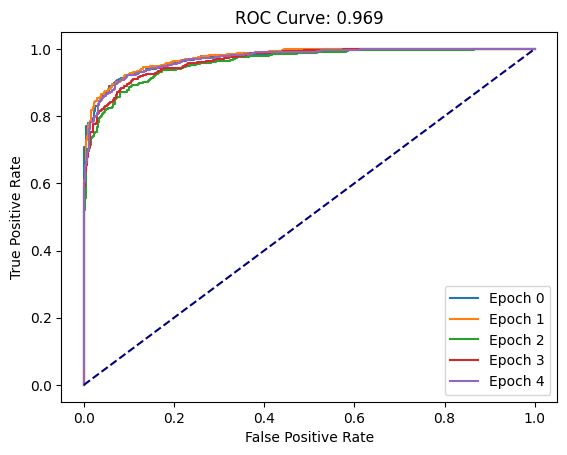

In [31]:
for i in range(cv_loader_logistic.num_folds):
    print("Fold {}, optimal threshold {:.3f}:".format(i, optimal_thresholds[i]))
    print(" - Accuracy: {:.3f}".format(accuracies[i]))
    print(" - Precision: {:.3f}".format(precisions[i]))
    print(" - Recall: {:.3f}".format(recalls[i]))
    print(" - F1 Score: {:.3f}".format(f1_scores[i]))
    print("=================================================================================")

print("Average:")
print(" - Accuracy: {:.3f} +- {:.3f}".format(np.mean(accuracies), np.std(accuracies)))
print(" - Precision: {:.3f} +- {:.3f}".format(np.mean(precisions), np.std(precisions)))
print(" - Recall: {:.3f} +- {:.3f}".format(np.mean(recalls), np.std(recalls)))
print(" - F1 Score: {:.3f} +- {:.3f}".format(np.mean(f1_scores), np.std(f1_scores)))
print("=================================================================================")

# plot the ROC curve
for i in range(cv_loader_logistic.num_folds):
    plt.plot(fprs[i], tprs[i], label="Epoch {}".format(i))    

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: {:.3f}".format(np.mean(aucs)))      
plt.savefig("{}/ours.png".format(roc_dir))
plt.legend()
plt.show()

From the mean and standard deviation results of Accuracy, Precision, Recall, and F1 Score across the 5 folds, we observe that there is minimal deviation (low standard deviation), indicating no significant performance difference across the folds.

### (g) ROC Curve - Logistic Regression (10 points) 

Use the logistic regression model from sklearn and repeat 5-fold cross validation. Then using roc curve package from sklearn.metrics, plot the ROC curve for each fold and compute the area under the curve. Is this result consistent with the results you obtained using the logistic regression model you implemented?

Traing on fold 0:
Fold 0: Accuracy: 0.915
Traing on fold 1:
Fold 1: Accuracy: 0.915
Traing on fold 2:
Fold 2: Accuracy: 0.888
Traing on fold 3:
Fold 3: Accuracy: 0.904
Traing on fold 4:
Fold 4: Accuracy: 0.910
Average AUC: 0.971


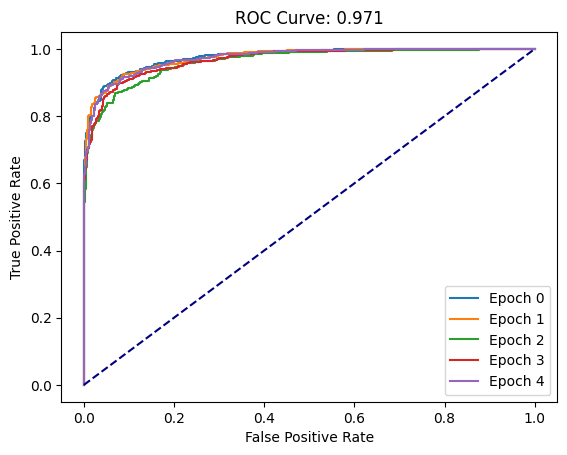

In [32]:
fprs = []
tprs = []
aucs = []
for i in range(cv_loader_logistic.num_folds):
    print("Traing on fold {}:".format(i))

    (train_data, train_label), (val_data, val_label) = cv_loader_logistic.get_fold(i)

    clf = sk_linear.LogisticRegression(max_iter=logistic_config["epochs"])
    clf.fit(train_data, train_label)
    
    y_pred = clf.predict_proba(val_data)[:,-1]
    

    accuracy = clf.score(val_data, val_label)
    print("Fold {}: Accuracy: {:.3f}".format(i, accuracy))

    # plot the roc curve
    fpr, tpr, _ = roc_curve(val_label, y_pred)
    auc = roc_auc_score(val_label, y_pred)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc)
    print("=================================================================================")    

print("Average AUC: {:.3f}".format(np.mean(aucs)))
for i in range(cv_loader_logistic.num_folds):
    plt.plot(fprs[i], tprs[i], label="Epoch {}".format(i))    

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: {:.3f}".format(np.mean(aucs)))      
plt.savefig("{}/sklearn.png".format(roc_dir))
plt.legend()
plt.show()



From the ROC curve comparison between section f (ours) and g (sklearn), it is evident that the performance is relatively the same, with both AUCs around 0.97, and an accuracy of 90% is achieved in predicting the label.

### (h) Inference - Linear and Logistic Regression

1. Use the trained linear regression model and predict the PT08.S1(CO) value for the test data.
2. Use the trained logistic regression model and predict the PT08.S1(CO) binary value (the same label you created in step d) for the test data.
3. Save the predictions in a csv file with two main columns. One for the linear regression predictions with the name pred_linear and one for the logistic regression predictions with the name pred_logistic.
4. Add this csv file to your submission.

Since there exists null data in the test set, I remove those rows that contains null data in the preprocessing section for test set as well. 

In [33]:
predictions_df = pd.DataFrame(columns=["pred_linear", "pred_logistic"])

linear_y_pred = linear_model.predict(test_df)
logistic_y_pred = logistic_model.predict(test_df)
logistic_y_pred = np.where(logistic_y_pred > best_threshold, 1, 0)

predictions_df["pred_linear"] = linear_y_pred
predictions_df["pred_logistic"] = logistic_y_pred

print(predictions_df.head(n=5))
out_path = "./Mu-Ruei_Tseng_preds.csv"
print("Saving the predictions to: {}".format(out_path))
predictions_df.to_csv(out_path, index=False)

   pred_linear  pred_logistic
0  1090.969385              1
1  1252.007228              1
2  1133.834839              1
3  1124.678011              1
4   909.532346              0
Saving the predictions to: ./Mu-Ruei_Tseng_preds.csv
